In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
pwd

'/Users/ginaleonardi/Documents/project_4/spaceship-titanic'

In [48]:
titanic_df = pd.read_csv('spaceship-titanic_nonans.csv')

In [49]:
titanic_df = titanic_df.drop('Unnamed: 0', axis=1)

In [50]:
titanic_df.head()

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [33]:
titanic_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Deck            0
RoomNum         0
Side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
AgeGroup        0
dtype: int64

In [34]:
titanic_df.nunique()

HomePlanet         3
CryoSleep          2
Deck               8
RoomNum         1818
Side               2
Destination        3
Age               81
VIP                2
RoomService     1274
FoodCourt       1508
ShoppingMall    1116
Spa             1328
VRDeck          1307
Transported        2
AgeGroup           7
dtype: int64

In [35]:
titanic_df['HomePlanet'].value_counts()

Earth     4720
Europa    2177
Mars      1796
Name: HomePlanet, dtype: int64

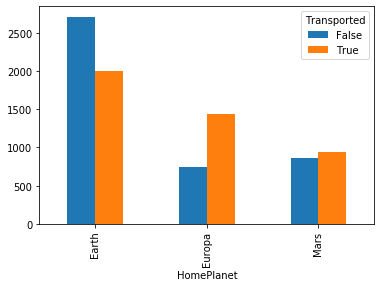

In [36]:
# Plot home planet

titanic_df.groupby(['HomePlanet', 'Transported']).size().unstack().plot(kind='bar', stacked=False)
plt.show()


In [37]:
titanic_df['Deck'].value_counts()

F    2847
G    2626
E     897
B     803
C     764
D     485
A     266
T       5
Name: Deck, dtype: int64

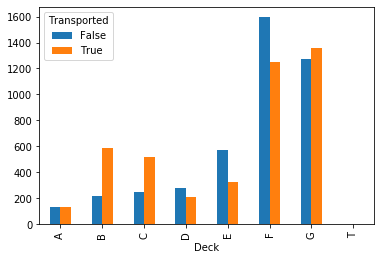

In [38]:
# Plot deck

titanic_df.groupby(['Deck', 'Transported']).size().unstack().plot(kind='bar', stacked=False)
plt.show()


In [39]:
titanic_df['CryoSleep'].value_counts()

False    5582
True     3111
Name: CryoSleep, dtype: int64

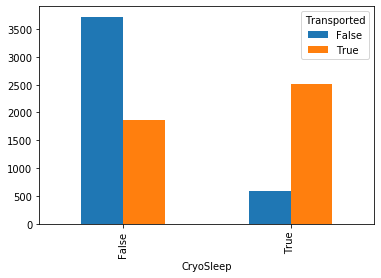

In [40]:
# Plot CryoSleep
titanic_df.groupby(['CryoSleep', 'Transported']).size().unstack().plot(kind='bar', stacked=False)
plt.show()


In [41]:
titanic_df['Side'].value_counts()

S    4376
P    4317
Name: Side, dtype: int64

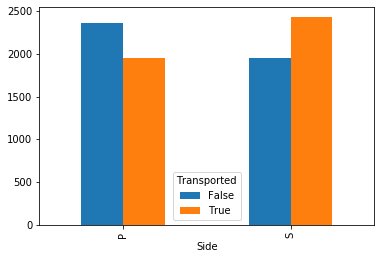

In [42]:
# Plot side 
titanic_df.groupby(['Side', 'Transported']).size().unstack().plot(kind='bar', stacked=False)
plt.show()

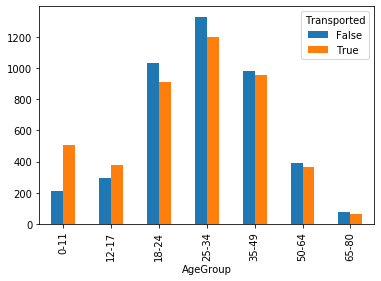

In [43]:
# Plot Age
age_bins = [0, 11, 17, 24, 34, 49, 64, 80]
age_labels = ['0-11', '12-17', '18-24', '25-34', '35-49', '50-64', '65-80']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels, right=False)

titanic_df.groupby(['AgeGroup', 'Transported']).size().unstack().plot(kind='bar', stacked=False)
plt.show()

In [44]:
titanic_df['AgeGroup'].value_counts()

25-34    2532
18-24    1942
35-49    1938
50-64     758
0-11      718
12-17     669
65-80     136
Name: AgeGroup, dtype: int64

In [45]:
titanic_df['Transported'].value_counts()
#titanic_df['Transported'].value_counts().plot(kind='bar')

True     4378
False    4315
Name: Transported, dtype: int64

In [46]:
# Coorelation

corr=titanic_df.corr()
corr

,CryoSleep,RoomNum,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.037159,-0.069536,-0.074514,-0.241492,-0.204231,-0.207543,-0.196714,-0.190897,0.456062
RoomNum,-0.037159,1.000000,-0.129538,-0.095226,-0.008454,-0.180021,0.001697,-0.126451,-0.136526,-0.044578
Age,-0.069536,-0.129538,1.000000,0.089766,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249
VIP,-0.074514,-0.095226,0.089766,1.000000,0.054668,0.124234,0.017867,0.058806,0.120842,-0.034560
RoomService,-0.241492,-0.008454,0.067612,0.054668,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048
FoodCourt,-0.204231,-0.180021,0.127937,0.124234,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074
ShoppingMall,-0.207543,0.001697,0.032655,0.017867,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019
Spa,-0.196714,-0.126451,0.120992,0.058806,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791
VRDeck,-0.190897,-0.136526,0.099210,0.120842,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825
Transported,0.456062,-0.044578,-0.074249,-0.034560,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000


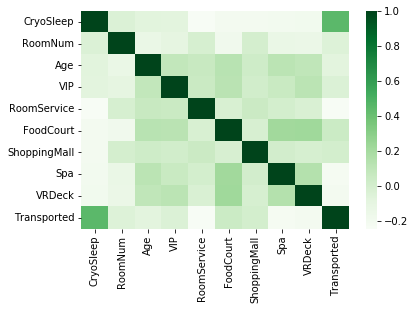

In [47]:
sns.heatmap(corr, cmap='Greens')

In [100]:
room_counts = titanic_df.groupby('RoomNum').size().rename('Count')
transported_counts = titanic_df[titanic_df['Transported'] == True].groupby('RoomNum').size().rename('Transported_Count')
transported_by_room_df = pd.concat([room_counts, transported_counts], axis=1).fillna(0)

transported_by_room_df.head()

,Count,Transported_Count
RoomNum,,
0.0,18,6.0
1.0,15,10.0
2.0,11,5.0
3.0,16,11.0
4.0,7,2.0
